# AdventureWorks Försäljninganalys
I denna analys ska vi undersöka databasen AdventureWorks2025 för att besvara frågorna såsom:
- Antal produkter per kategori
- Försäljning per produktkategori
- Försäljning över tid 
- Försäljning och antal ordrar per år
- Top 10 produkter
- Försäljning och antal kunder per region 
- Genomsnittligt ordervärde per region och kundtyp 

Vi använder SQL för att hämta data och python för att visualisera analysen.




In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

user = "SA"
password = quote_plus("Jasiek2005")
server = 'localhost,1433'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 18 for SQL server")


connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("Anslutning till SQL Server lyckades")
except Exception as e:
    print("Kunde inte ansluta", e)

Anslutning till SQL Server lyckades


C:\Users\janek\AppData\Local\Temp\ipykernel_12612\1452838393.py:24: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [5]:
def query_df(sql: str): 
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)


## Visualisering 1: Antal produkter per kategori 
Affärsfråga: Hur många produkter finns i varje kategori?

Tabbeler: 
 Production.ProductCategory, Production.ProductSubcategory, Production.Product

 Plan: 

 - Gör en JOIN på tabellerna

 - Räkna DISTINCT produkter per kategori

 - Skapa en vertikal stapeldiagram(bar) med DESC ordning 
 
 - Analysera resultatet


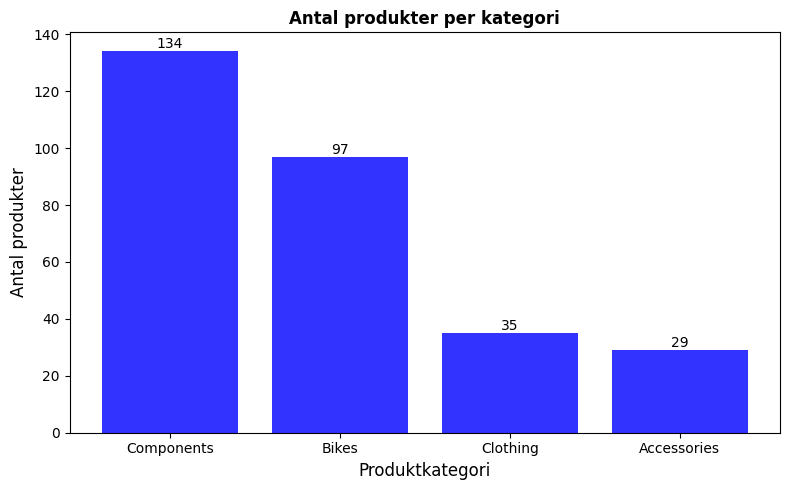

In [14]:
query_vis1 = """ 
SELECT
    pc.Name AS CategoryName, 
    COUNT(DISTINCT p.ProductID) AS ProductCount

FROM Production.ProductCategory pc   
INNER JOIN Production.ProductSubcategory psc ON pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product p ON psc.ProductSubcategoryID = p.ProductSubcategoryID
GROUP BY pc.Name 
ORDER BY ProductCount DESC

"""

df_vis1= query_df(query_vis1)

fig,ax = plt.subplots(figsize=(8,5))
bars= ax.bar(df_vis1['CategoryName'], df_vis1['ProductCount'], color='blue', alpha=0.8)

for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() /2,
            height,
            f'{int(height)}',
            ha ='center',
            va = 'bottom'
        )

ax.set_xlabel("Produktkategori", fontsize=12)
ax.set_ylabel("Antal produkter", fontsize=12)
ax.set_title("Antal produkter per kategori" ,fontsize=12, fontweight= 'bold')
plt.tight_layout()
plt.show()


### Insikter - Antal produkter per kategori

Components är den största kategorin med 134 produkter 

Accesories är den minsta kategorin med bara 29 produkter i sin kategori

Detta indikerar att företagets största fokus ligger på komponenter som är nästan hälften av hela försäljningen och att 
Accesories och Clothing kan vara ett utvecklingsområde

